In [13]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [14]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [15]:
filename = '../csv_detection_info/21_0, darlig kvalitet.csv'
filename_clean = '../csv_detection_info_clean/21_0, darlig kvalitet.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/21/0, darlig kvalitet'

In [16]:
detection_df = pd.read_csv(filename)

In [17]:
detection_df

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
134  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
135  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
136  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
137  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
138  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.82.1.1.1314.1304108018.192.168.1.48....     1361     1527   
1    1.2.276.0.82.1.1.1314.1304108018.192.168.1.48....     1563     1731   
2    1.2.276.0.82.1.1.1430.1216030460.10.0.0.10.665...        0        0   
3    1.2.276.0.82.1.1.1430.1216030460.10.0.0.10.665...     1504     1666   
4    1.2.276.0.82.1.1.1430.1691422380.10.105.3.81.6...     1364     1521   
..                                                 ...      ...      ...   
134  1.3.51.0.7.846986839.33984.45376.33783.14087.7...     1561     1699   
135  1.3.6.1.4.1.19179.1.14146382126821.3.24238.785...     1007     1134   
136  1.3.6.1.4.1.19179.1.14146382126821.3.24920.790...     1384     1515   
137  172.177.1126.1225.1148.1223.20210205104637.21.dcm        0        0   
138  172.177.1126.1225.1148.1223.20210205104733.23.dcm        0        0   

     ax1_min  ax1_max  confidence  year  diagnosis      diagnosis_raw  
0       1493     1660    0.999997    21          0  0 adrlig kvalitet  
1        740      908    0.999662    21          0  0 adrlig kvalitet  
2          0        0    0.000000    21          0  0 adrlig kvalitet  
3       1370     1531    0.999957    21          0  0 adrlig kvalitet  
4       1178     1335    0.999994    21          0  0 adrlig kvalitet  
..       ...      ...         ...   ...        ...                ...  
134     1414     1552    0.999359    21          0  0 adrlig kvalitet  
135      529      657    0.999973    21          0  0 adrlig kvalitet  
136      297      428    0.999975    21          0  0 adrlig kvalitet  
137        0        0    0.000000    21          0  0 adrlig kvalitet  
138        0        0    0.000000    21          0  0 adrlig kvalitet  

[139 rows x 10 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [18]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [22]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([2, 31, 32, 42, 56, 59, 62, 66, 85, 95, 107, 108, 137, 138], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [20]:
# plot every 9 of them

C:\NMBU\TEMP\ipykernel_15080\89006417.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')
C:\NMBU\TEMP\ipykernel_15080\89006417.py:5: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')


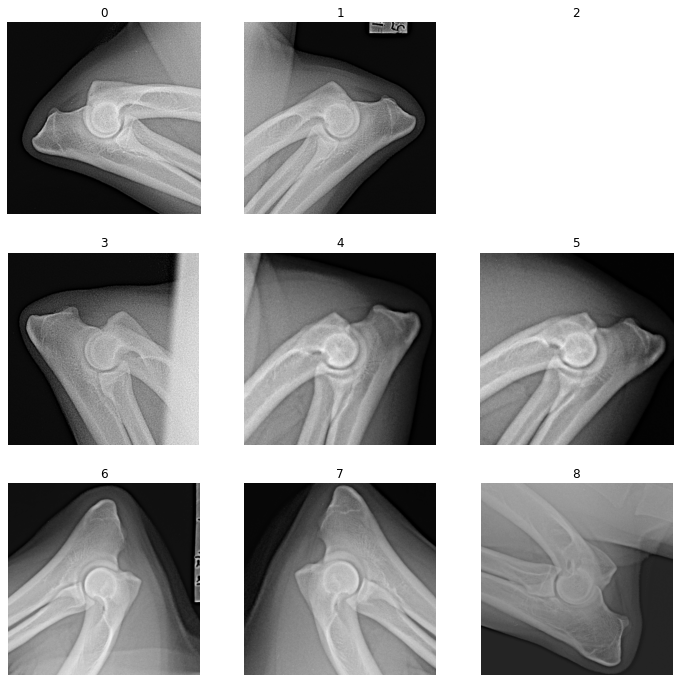

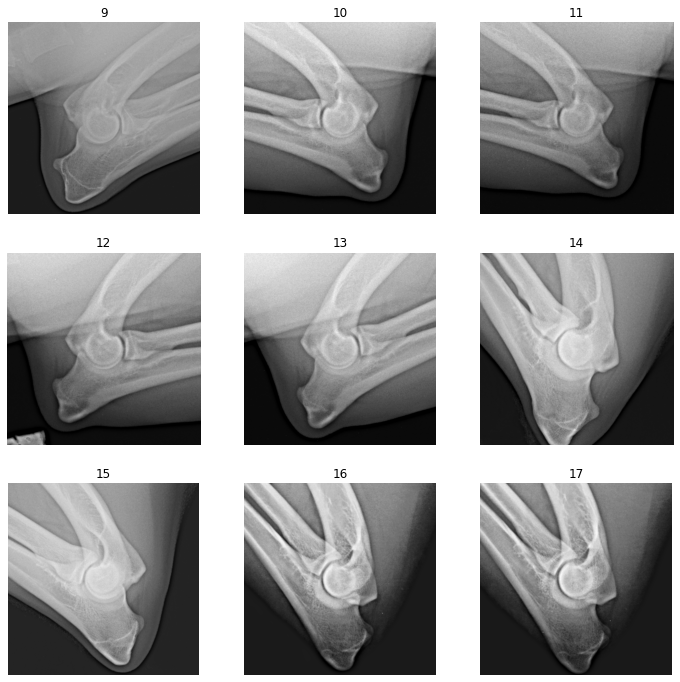

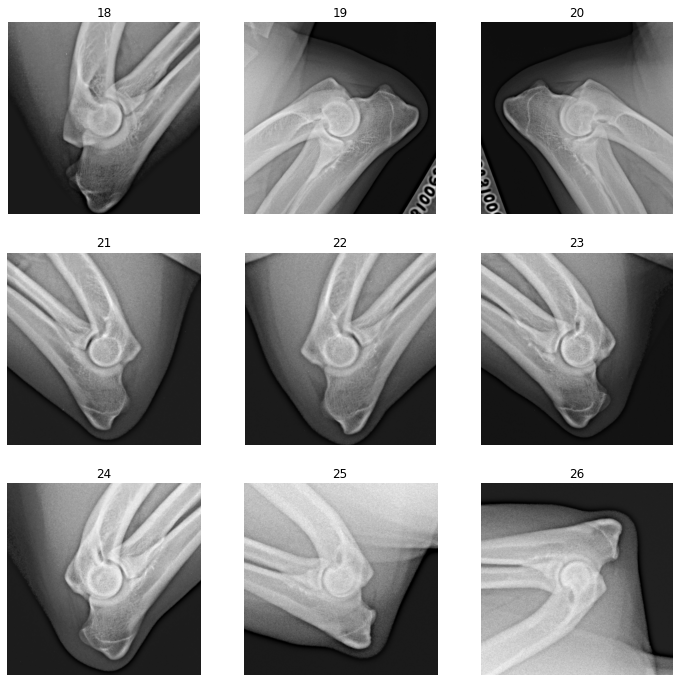

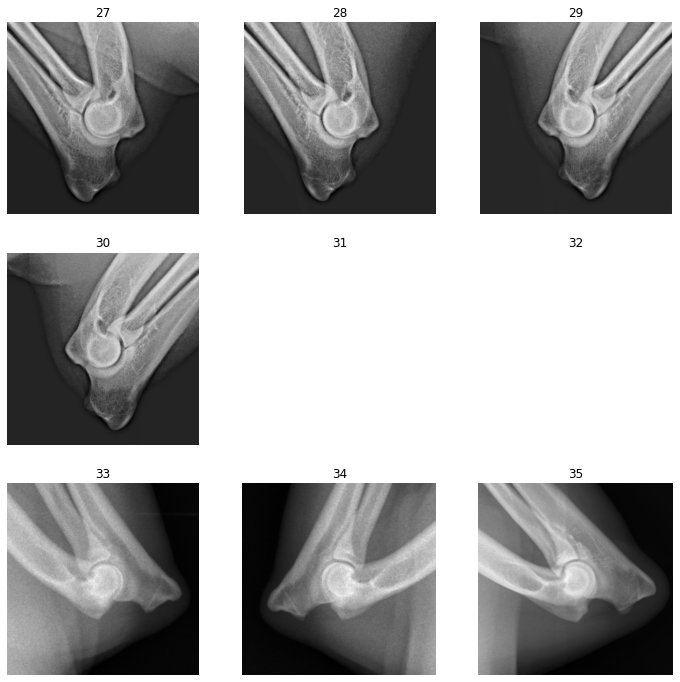

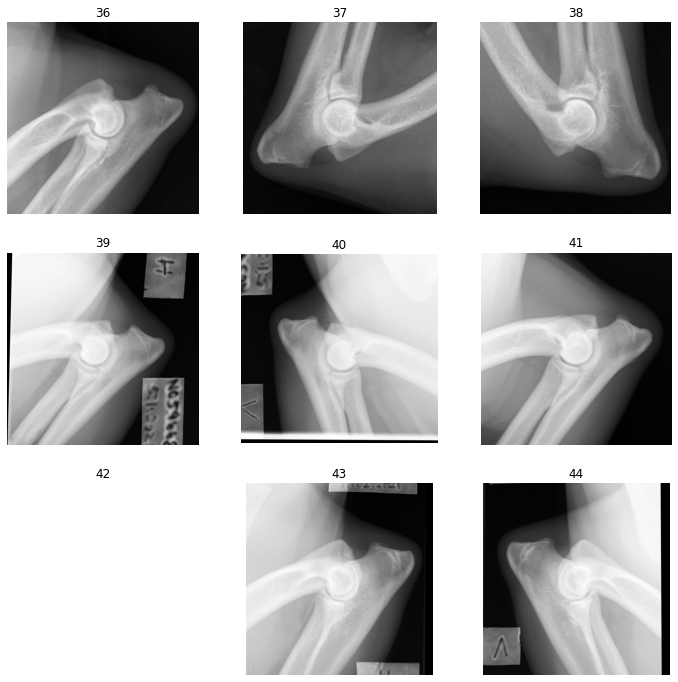

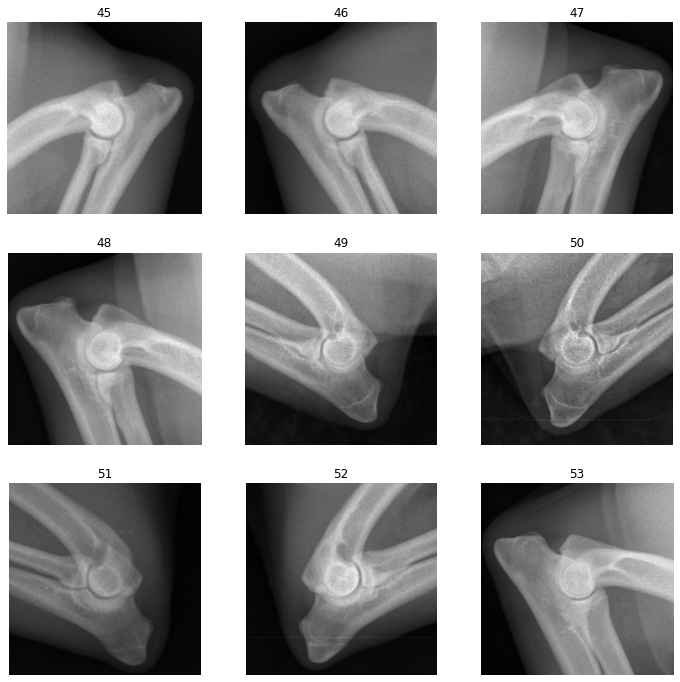

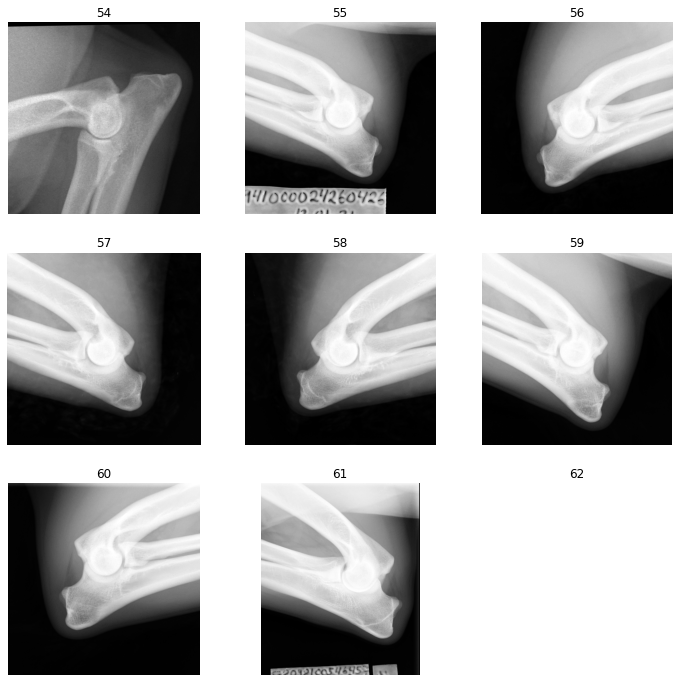

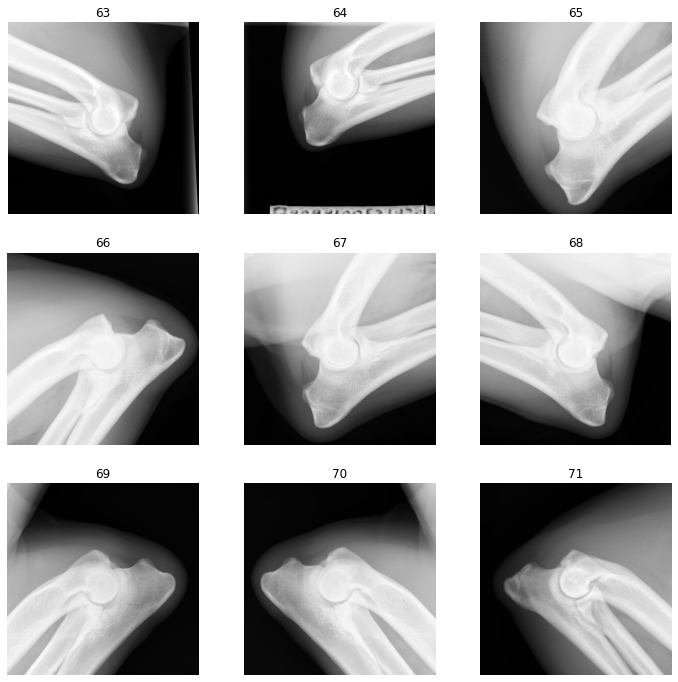

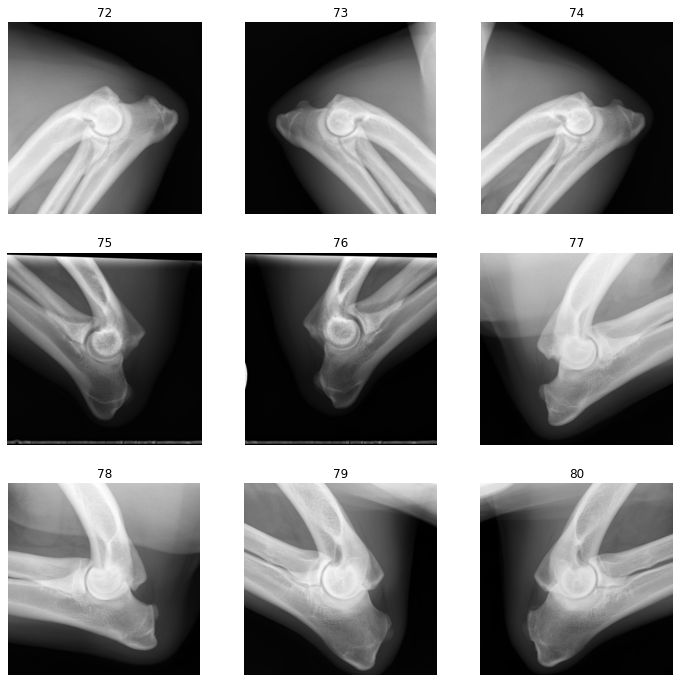

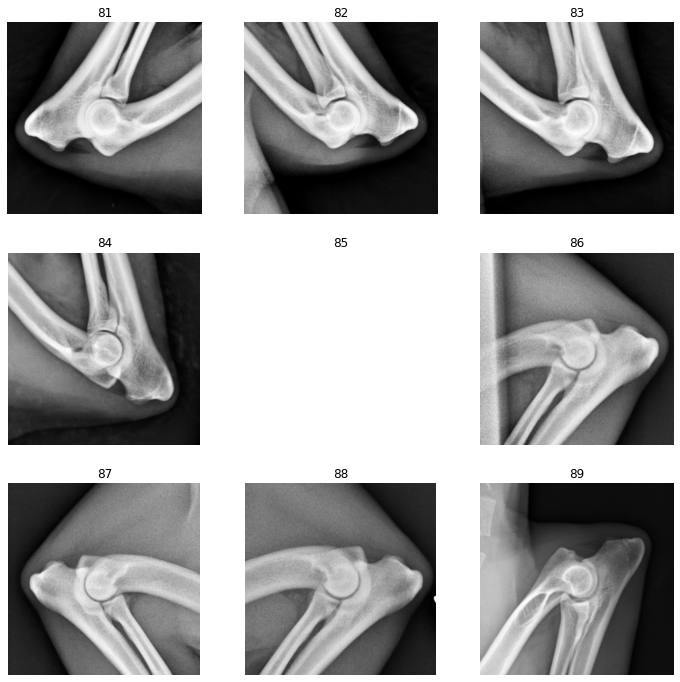

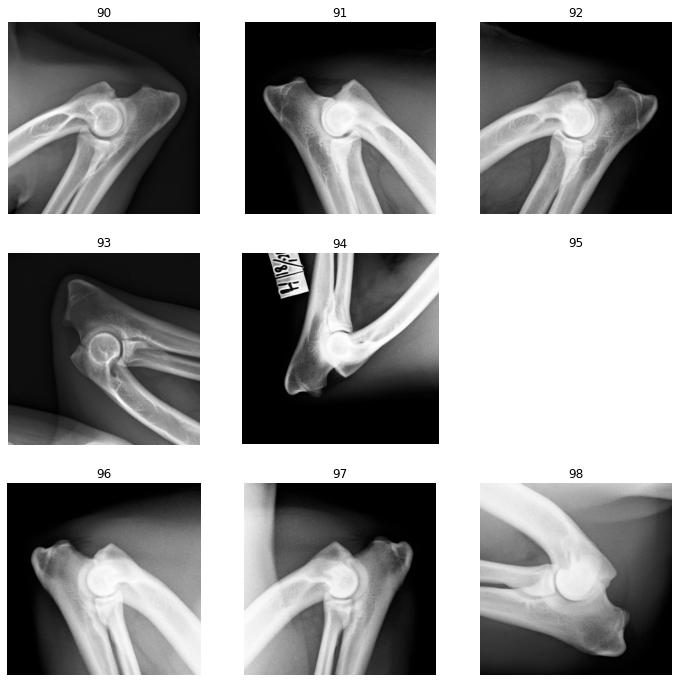

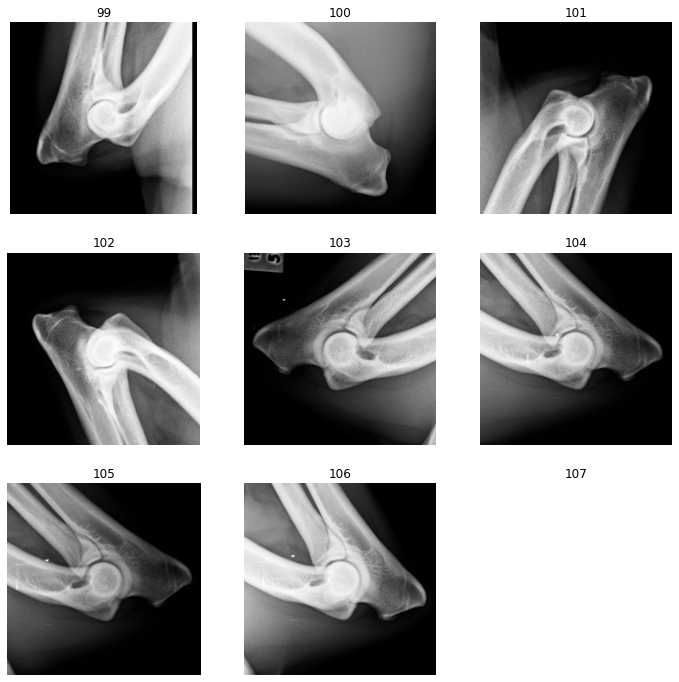

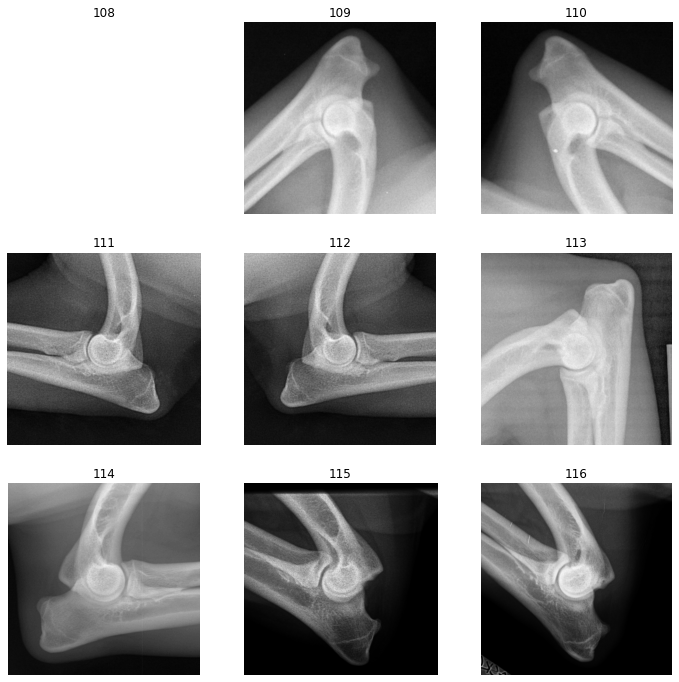

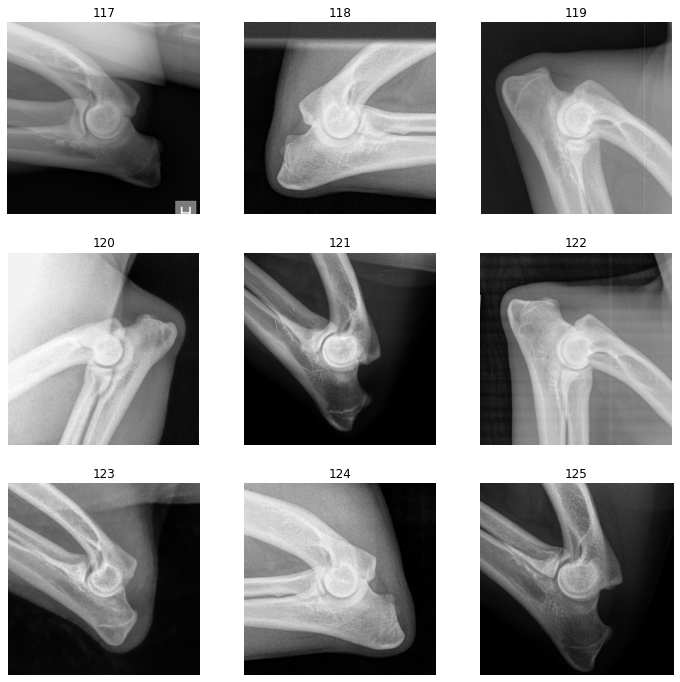

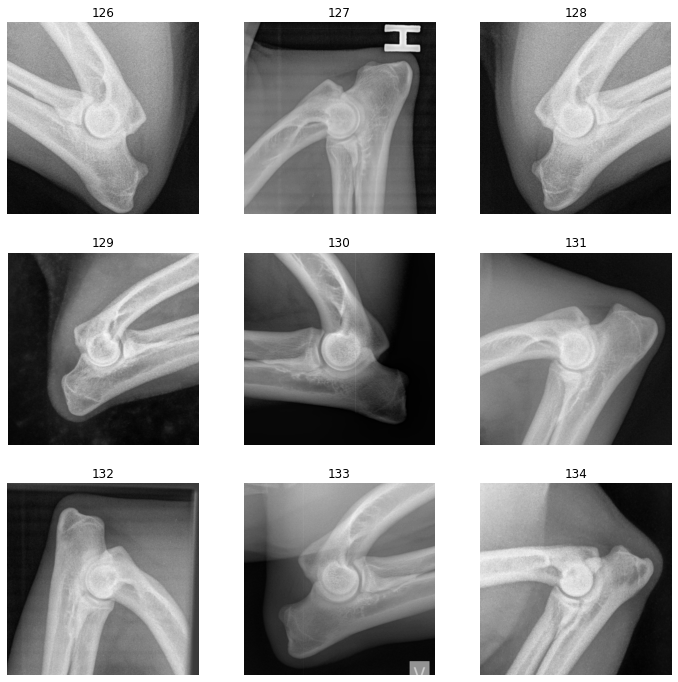

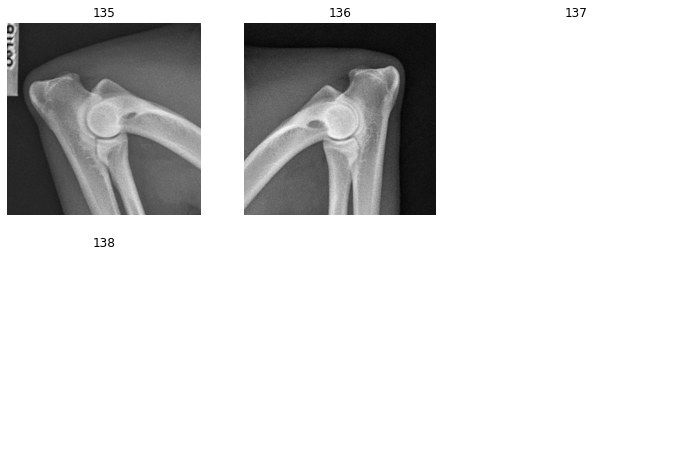

In [21]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [23]:
remove_indice = [2, 31, 32, 42, 62, 85, 95, 107, 108, 137, 138]
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
5    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
132  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
133  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
134  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
135  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
136  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.82.1.1.1314.1304108018.192.168.1.48....     1361     1527   
1    1.2.276.0.82.1.1.1314.1304108018.192.168.1.48....     1563     1731   
3    1.2.276.0.82.1.1.1430.1216030460.10.0.0.10.665...     1504     1666   
4    1.2.276.0.82.1.1.1430.1691422380.10.105.3.81.6...     1364     1521   
5    1.2.276.0.82.1.1.1430.1691422380.10.105.3.81.6...     1402     1558   
..                                                 ...      ...      ...   
132  1.3.51.0.7.527645277.21717.53579.44489.61962.4...     1424     1580   
133  1.3.51.0.7.670733867.32197.48450.45207.48409.5...      906     1079   
134  1.3.51.0.7.846986839.33984.45376.33783.14087.7...     1561     1699   
135  1.3.6.1.4.1.19179.1.14146382126821.3.24238.785...     1007     1134   
136  1.3.6.1.4.1.19179.1.14146382126821.3.24920.790...     1384     1515   

     ax1_min  ax1_max  confidence  year  diagnosis      diagnosis_raw  
0       1493     1660    0.999997    21          0  0 adrlig kvalitet  
1        740      908    0.999662    21          0  0 adrlig kvalitet  
3       1370     1531    0.999957    21          0  0 adrlig kvalitet  
4       1178     1335    0.999994    21          0  0 adrlig kvalitet  
5       1258     1415    0.999989    21          0  0 adrlig kvalitet  
..       ...      ...         ...   ...        ...                ...  
132      898     1054    0.999663    21          0  0 adrlig kvalitet  
133      908     1080    0.999848    21          0  0 adrlig kvalitet  
134     1414     1552    0.999359    21          0  0 adrlig kvalitet  
135      529      657    0.999973    21          0  0 adrlig kvalitet  
136      297      428    0.999975    21          0  0 adrlig kvalitet  

[128 rows x 10 columns]

In [24]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [25]:
new_detection_df.to_csv(filename_clean, index=False)